## 0. IMPORTING LIBRARIES TO USE

In [1]:
import numpy as np
import pandas as pd
  
#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#To plot the graph embedded in the notebook
%matplotlib inline

In [ ]:
#imports from sklearn library
from sklearn import datasets
from sklearn.preprocessing import StandardScaler,PolynomialFeatures, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.svm import LinearSVR, SVR, NuSVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
# Cross Validation 
# ======== -- 1
# -- ======== 2
# ===== -- == 3
# == -- ===== 4 

# Importing data 
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

## 1. IMPORTING AND GETTING TO KNOW OUR DATA 

In [ ]:
df=pd.DataFrame(housing.data,columns = housing.feature_names)
df['price']=housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# print(housing.DESCR)

## 2. EDA - Exploratory Data Analysis 

### 2.1 Missingness

Text(0.5, 1.0, 'Missing Values Heatmap')

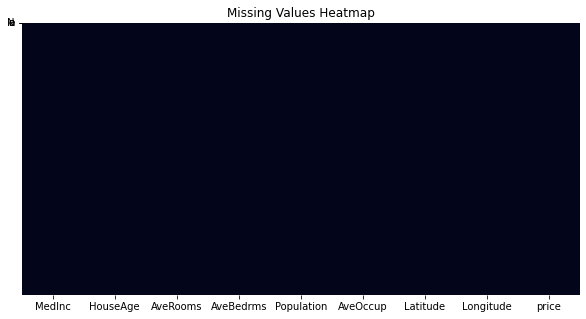

In [61]:
# Explore missingness 
plt.figure(figsize=(10,5))

sns.heatmap(df.isnull(), yticklabels="None", cbar=False)
plt.title("Missing Values Heatmap")

#### Insights/Deductions 
There is not any variable with missing values in our data. 

### 2.2 Distribution in the Data

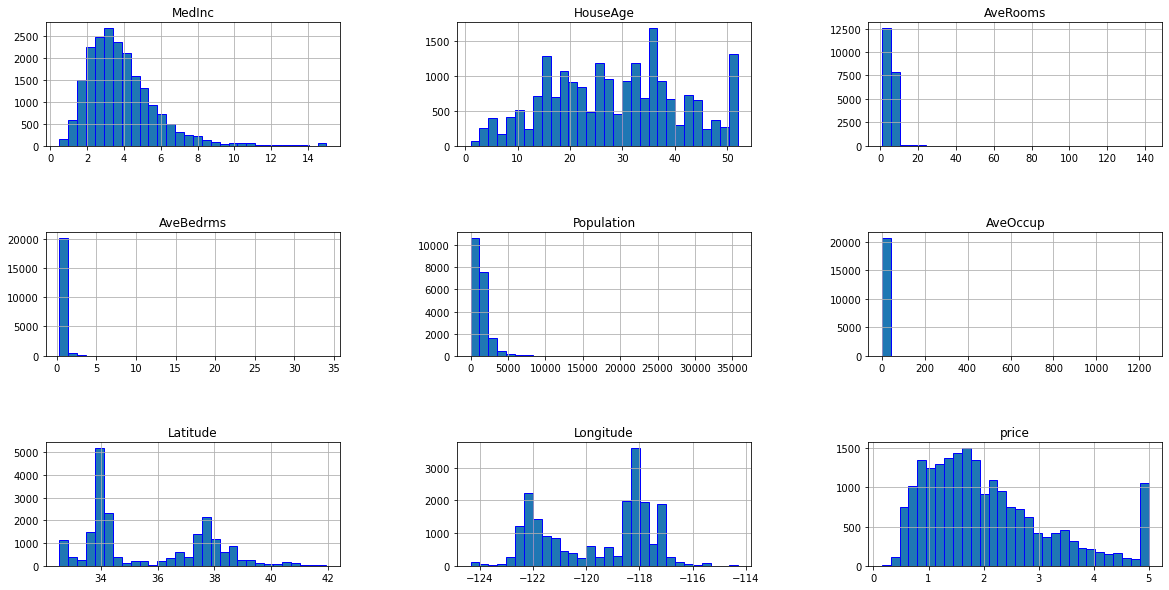

In [62]:
# Distribution of the data 
df.hist(figsize=(20, 10), bins=30, edgecolor="blue")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

#### Insights 
- Median income is a normal distribution / Gaussian Distribution 
- House age is more or less uniformly distribution 
- Average rooms, average bedrooms, average occupation, and population, the range of the data is large with unnoticeable bin for the largest values (can be considered as outliers) 
- Price is normally distributed, we have a threshold-effect for high-valued houses: all houses with a price above 5 are given the value 5

### 2.3 Outliers

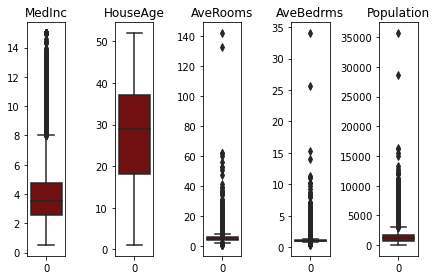

In [63]:
## Exploring outliers further 

# Store the list of columns
columns_to_plot = list(df.columns[0:5])

# Create the figure and two subplots
fig, axes = plt.subplots(ncols=len(columns_to_plot))
for i,j in zip(columns_to_plot,axes): 
    sns.boxplot(data=df[i],ax=j,color="Maroon")
    j.set_title(i)


plt.tight_layout()
plt.show()

![outliers](https://miro.medium.com/v2/resize:fit:1200/1*0MPDTLn8KoLApoFvI0P2vQ.png)

In [64]:
# Eploring outliers 
features = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
df[features].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


#### Insights 
- Comparing the max and 75% values, we can see a huge difference. It confirms the intuitions that there are a couple of extreme values.

### 2.4 Location Data

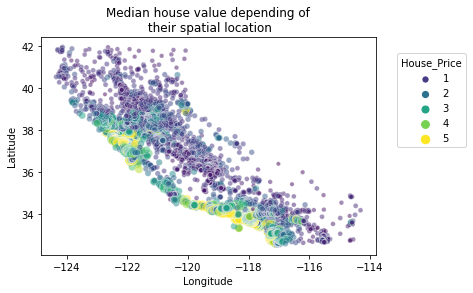

In [65]:
# # Exploring location data 
sns.scatterplot(
    data=df,
    x="Longitude",
    y="Latitude",
    size="price",
    hue="price",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="House_Price", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")
# plt.figure(figsize=(100,50))

### Insight 
- Houses closer to the coast are more pricey compared to those on-shore

### 2.5 Relationship between variables

In [ ]:
## Pairplot 
df_pair = df.drop(['Longitude','Latitude'],axis=1)
sns.pairplot(data=df_pair, hue="price", palette="viridis")


## 3. DATA PREPROCESSING FOR MODELLING 

In [ ]:
# Feature Scaling : Robust Scaler , Standard Scaler , MinMax Scaler 
scaler = MinMaxScaler()
df_pair_scale = scaler.fit_transform(df_pair.drop('price',axis=1))
df_pair_normalized = pd.DataFrame(df_pair_scale,columns=df_pair.drop('price',axis=1).columns)
df_pair_normalized.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198


In [ ]:
# Feature Scaling : Robust Scaler , Standard Scaler , MinMax Scaler 
scaler = StandardScaler()
df_pair_scale = scaler.fit_transform(df_pair.drop('price',axis=1))
df_pair_standardized = pd.DataFrame(df_pair_scale,columns=df_pair.drop('price',axis=1).columns)
df_pair_standardized.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616


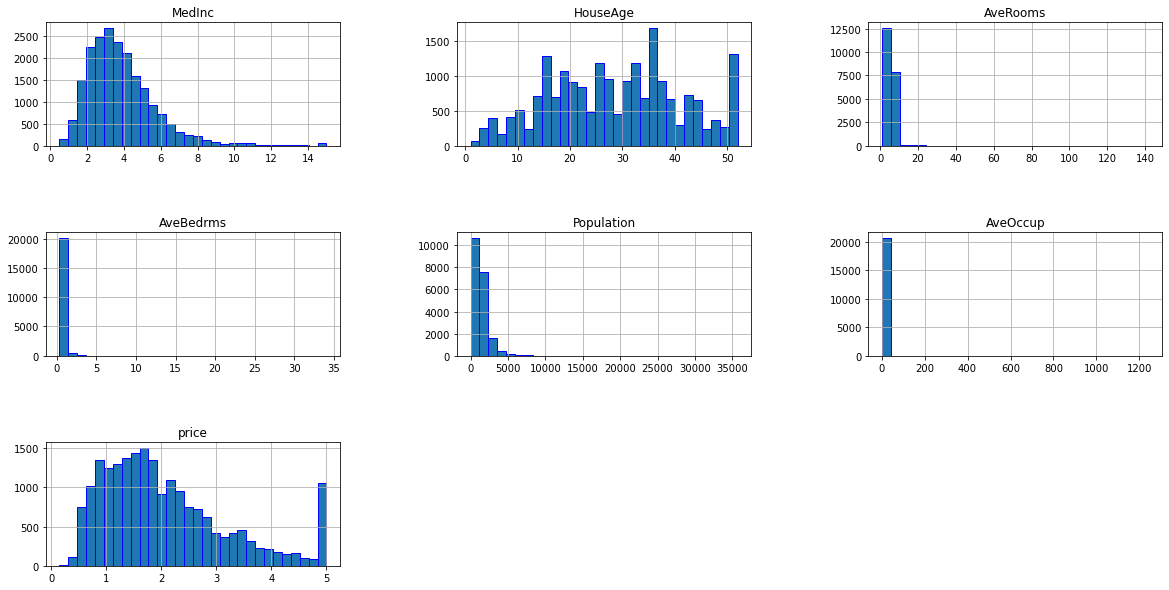

In [ ]:
# Distribution of the data 
df_pair.hist(figsize=(20, 10), bins=30, edgecolor="blue")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

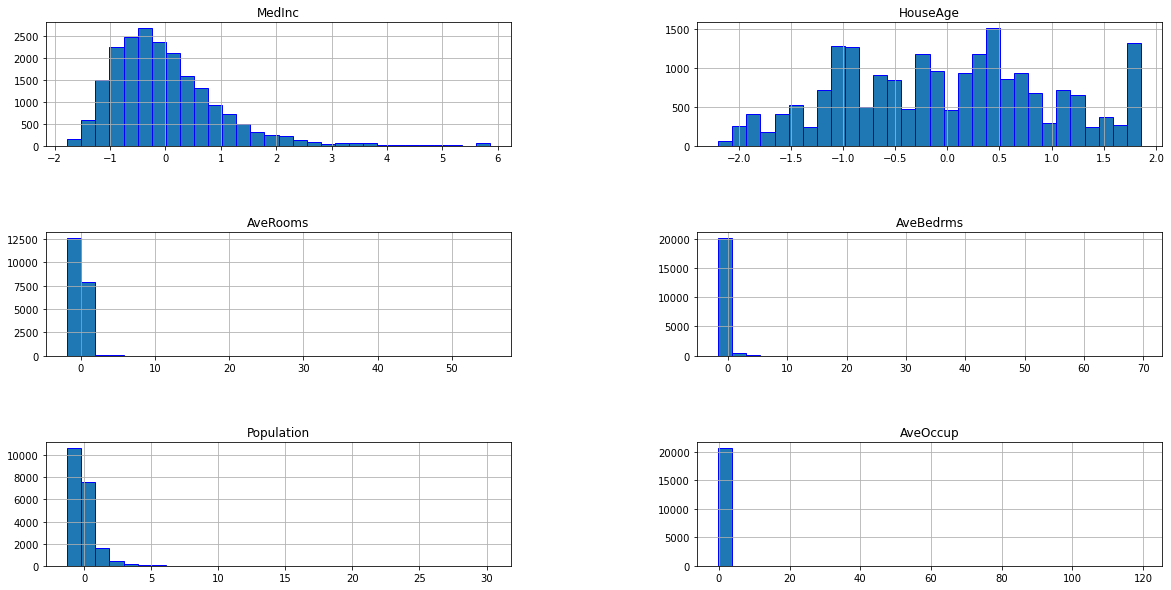

In [ ]:
# Distribution of the data 
df_pair_standardized.hist(figsize=(20, 10), bins=30, edgecolor="blue")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

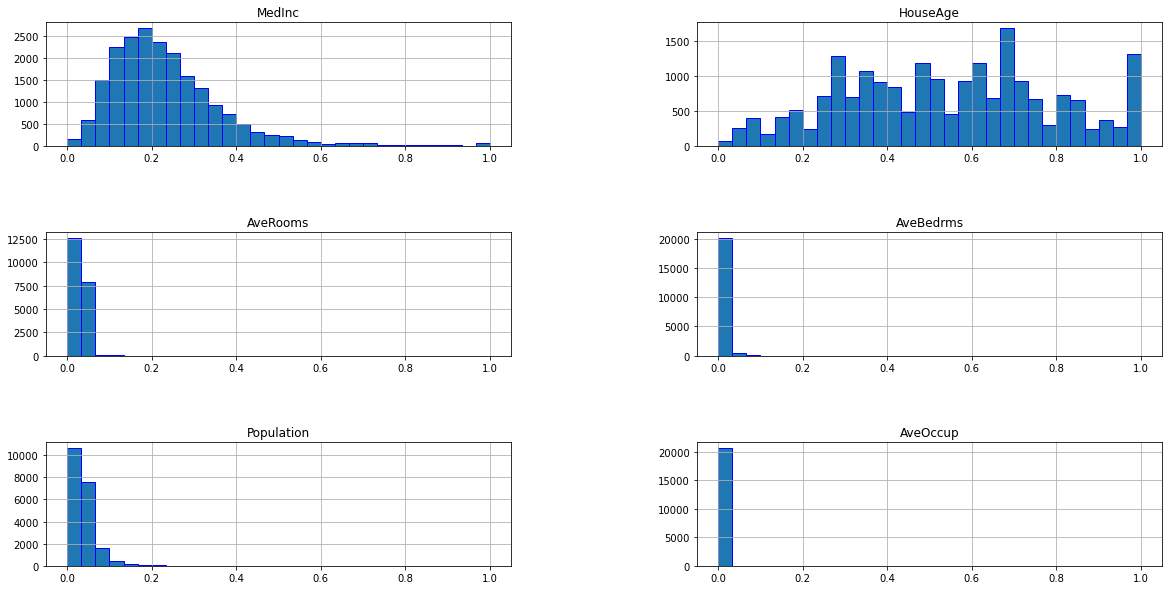

In [ ]:
# Distribution of the data 
df_pair_normalized.hist(figsize=(20, 10), bins=30, edgecolor="blue")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

## 4. CROSS VALIDATED MODELLING 

In [67]:
# Separate the data into the Features and the Outcome 
X = df.drop('price',axis=1)
y=df['price']
print(X.shape, y.shape)

(20640, 8) (20640,)


In [68]:
# Simplie Linea Reg

pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=1),LinearRegression())
scores = cross_val_score(pipe, X, y, cv=5, scoring='r2')

print(scores, scores.mean())

[0.54866323 0.46820691 0.55078434 0.53698703 0.66051406] 0.5530311140279561


In [78]:
# Without Cross Validation 

# Scale the Data Before Fitting it 
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=40)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Regression Model 
from sklearn.metrics import  r2_score

reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
r2_score (y_test,y_pred)

(14448, 8) (6192, 8) (14448,) (6192,)


0.594460262517205

In [79]:
#  Trying Random Forest Regressor 

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print(scores, scores.mean())

[0.51444392 0.70250988 0.74218687 0.62085577 0.68358944] 0.6527171752942982


In [85]:
#  Ridge Regression 
pipe = make_pipeline(RobustScaler(),PolynomialFeatures(degree=1), Ridge(alpha=100))
scores = cross_val_score(pipe, X, y, cv=5, scoring='r2')

print(scores, scores.mean())

[0.5595841  0.46543237 0.5518933  0.51983621 0.64857372] 0.5490639396551174


In [88]:
model = NuSVR(C=1, kernel='rbf',degree=1)
scores = cross_val_score(model, X, y, cv=3, scoring='r2')

print(scores, scores.mean())

[0.69156486 0.70867547 0.6366411 ] 0.6789604747339509


## 5. MODEL ERROR ANALYSIS

## 6. MODEL TUNING

## 7. MODEL DEPLOYMENT